# 1. Importar librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

from importlib import reload
import utils  # Importa el módulo
reload(utils)  # Recarga el módulo

<module 'utils' from 'c:\\Users\\Usuario\\OneDrive - Universidad de Antioquia\\Documentos\\Universidad\\Analitica2\\Proyecto\\pediccion_abandono_empleo\\utils.py'>

# 2. Obtener datos

#### Importar datos

In [4]:
df_anova = pd.read_csv('Datasets/seleccion_anova.csv')
df_total = pd.read_csv('Datasets/datos_preparados.csv')

#### Separar variable objetivo y hacer el split

In [5]:
X = df_anova
y = df_total.target

X_train, X_test, y_train, y_test = utils.split(X, y, test_size = 0.2)

X train shape:  (3520, 30)
y train shape:  (881, 30)
X test shape:  (3520,)
y test shape:  (881,)


## 3. Random Forest Classifier

#### Definir grilla

In [15]:
# Definición de cuadricula de hiperparametros
parameters = {'max_depth': [60,70,80,90],
              'max_features': [0.9,1],
              'max_leaf_nodes': [90,100,110,120],
              'min_samples_leaf': [3,5,7,9],
              'n_estimators': [800]}

#### Realizar la búsqueda

In [16]:
ranfor = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

rand_s = RandomizedSearchCV(estimator=ranfor,
                            param_distributions=parameters,
                            n_iter=10,
                            scoring='f1',
                            cv=5,
                            verbose=False)
rand_s.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   param_distributions={'max_depth': [60, 70, 80, 90],
                                        'max_features': [0.9, 1],
                                        'max_leaf_nodes': [90, 100, 110, 120],
                                        'min_samples_leaf': [3, 5, 7, 9],
                                        'n_estimators': [800]},
                   scoring='f1', verbose=False)

In [17]:
rand_s.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=60, max_features=0.9,
                       max_leaf_nodes=120, min_samples_leaf=5, n_estimators=800,
                       n_jobs=-1, random_state=42)

#### Instanciar y ajustar modelo con los mejores hiperparámetros encontrados

In [18]:
ranfor_opt = RandomForestClassifier(class_weight='balanced', max_depth=60, max_features=0.9,
                       max_leaf_nodes=120, min_samples_leaf=5, n_estimators=800,
                       n_jobs=-1, random_state=42
)
ranfor_opt.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=60, max_features=0.9,
                       max_leaf_nodes=120, min_samples_leaf=5, n_estimators=800,
                       n_jobs=-1, random_state=42)

#### Desempeño en train

------------------------------ TRAIN ------------------------------


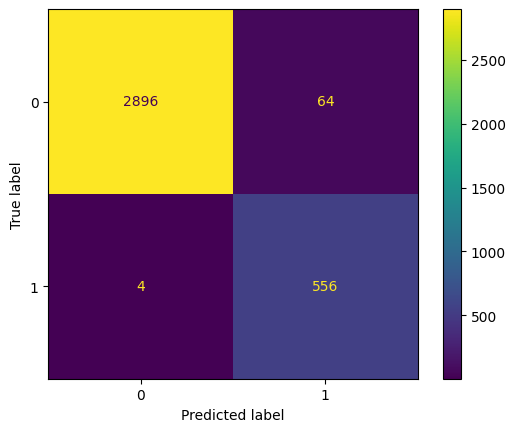

Precision: 0.896774193548387
Recall: 0.9928571428571429
Especificidad: 0.9783783783783784
F1 score: 0.9423728813559321
Train score:  0.9806818181818182


In [19]:
precision_rf_train, recall_rf_train, especificidad_rf_train, f1_score_rf_train = utils.metricas(ranfor_opt, X_train, y_train, 'TRAIN')

#### Desempeño en test

------------------------------ TEST ------------------------------


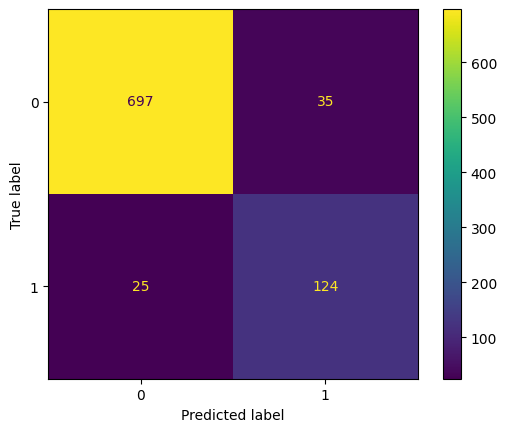

Precision: 0.779874213836478
Recall: 0.8322147651006712
Especificidad: 0.9521857923497268
F1 score: 0.8051948051948054
Train score:  0.9318955732122588


In [20]:
precision_rf_test, recall_rf_test, especificidad_rf_test, f1_score_rf_test = utils.metricas(ranfor_opt, X_test, y_test, 'TEST')

# 4. Xtreme gradient Boosting

#### Definir grilla

In [26]:
# Definición de cuadricula de hiperparametros
parameters_gb =  {'eta': [0.3,0.4,0.5,0.6],
              'colsample_bytree': [0.8,0.9,1],
              'max_depth': [4,6,8,10,12],
              'n_estimators': [800,1000,1200],
              'learning_rate':[0.1,0.2,0.3]
              }

#### Realizar búsqueda

In [36]:
XGBmodel = XGBClassifier(random_state = 42, classmethod='')

rand_s_xgb = RandomizedSearchCV(estimator = XGBmodel,
                            param_distributions = parameters_gb,
                            n_iter = 100,
                            scoring = 'f1',
                            cv = 5,
                            verbose = False,
                            n_jobs = -1)
rand_s_xgb.fit(X_train, y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:01:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "classmethod" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None, classmethod='',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=Non...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1],
                                        'eta': [0.3, 0.4, 0.5, 0.6],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [4, 6, 8, 10, 12],
                                        'n_estimators': [800, 1000, 1200]},
                   scoring='f1', verbose=False)

In [37]:
rand_s_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None, classmethod='',
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.4, eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1200, n_jobs=None, ...)

#### Instanciar y ajustar modelo con mejores hiperparámetros

In [6]:
xgb_opt = XGBClassifier(random_state=42, n_jobs=-1,learning_rate=0.2,max_depth=6,n_estimators=1400,colsample_bytree=0.9
    
)
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1400, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

#### Desempeño en train

------------------------------ TRAIN ------------------------------


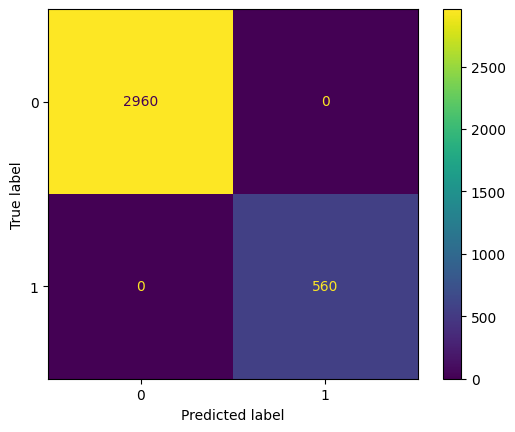

Precision: 1.0
Recall: 1.0
Especificidad: 1.0
F1 score: 1.0
Train score:  1.0


In [7]:
precision_xgb_train, recall_xgb_train, especificidad_xgb_train, f1_score_xgb_train = utils.metricas(xgb_opt , X_train, y_train, 'TRAIN')

#### Desempeño en test

------------------------------ TEST ------------------------------


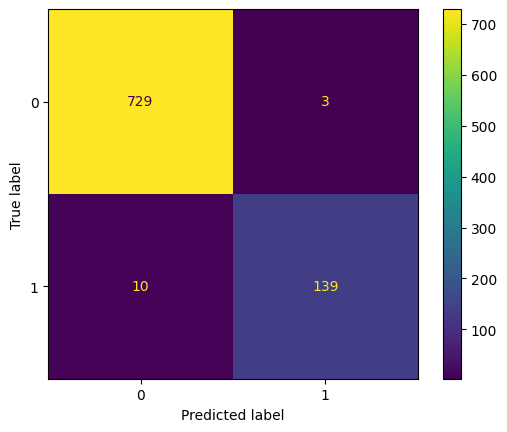

Precision: 0.9788732394366197
Recall: 0.9328859060402684
Especificidad: 0.9959016393442623
F1 score: 0.9553264604810996
Train score:  0.985244040862656


In [8]:
precision_xgb_test, recall_xgb_test, especificidad_xgb_test, f1_score_xgb_test = utils.metricas(xgb_opt, X_test, y_test, 'TEST')

# 5. Suport Vector Machine 

#### Definir grilla

In [96]:
param_svm = {
    'gamma': [0.2,0.3,0.4,0.5,0.6,0.7]
    }

#### Hacer la búsqueda

In [97]:
svm = SVC(random_state = 42, class_weight = 'balanced')

rand_s_svm = RandomizedSearchCV(estimator = svm,
                            param_distributions = param_svm,
                            n_iter = 10,
                            scoring = 'f1',
                            cv = 5,
                            verbose = False,
                            n_jobs = -1)
rand_s_svm.fit(X_train, y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=SVC(class_weight='balanced', random_state=42),
                   n_jobs=-1,
                   param_distributions={'gamma': [0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7]},
                   scoring='f1', verbose=False)

In [98]:
rand_s_svm.best_estimator_

SVC(class_weight='balanced', gamma=0.3, random_state=42)

#### Instanciar y ajustar modelo con mejores hiperparámetros

In [102]:
svm_opt = SVC(class_weight='balanced', gamma=0.4, random_state=42,
        )
svm_opt.fit(X_train, y_train)

SVC(class_weight='balanced', gamma=0.4, random_state=42)

#### Desempeño en train

------------------------------ TRAIN ------------------------------


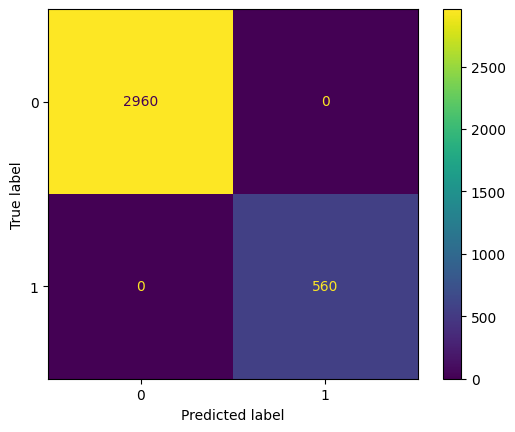

Precision: 1.0
Recall: 1.0
Especificidad: 1.0
F1 score: 1.0
Train score:  1.0


In [103]:
precision_svm_train, recall_svm_train, especificidad_svm_train, f1_score_svm_train = utils.metricas(svm_opt, X_train, y_train, 'TRAIN')

#### Desempeño en test

------------------------------ TEST ------------------------------


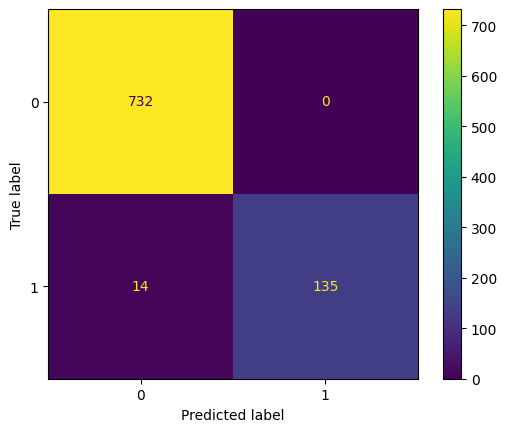

Precision: 1.0
Recall: 0.9060402684563759
Especificidad: 1.0
F1 score: 0.9507042253521127
Train score:  0.9841089670828603


In [104]:
precision_svm_test, recall_svm_test, especificidad_svm_test, f1_score_svm_test = utils.metricas(svm_opt, X_test, y_test, 'TEST')

In [9]:
import joblib

# Supongamos que "modelo" es tu modelo entrenado
joblib.dump(xgb_opt, 'Modelos/xgb_opt_anova.pkl')

['Modelos/xgb_opt_anova.pkl']